In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
class vertex:
    def __init__(self,x,y, name = None):
        self.x = x
        self.y = y
        self.name = name
    
    def __repr__(self):
        return f'({self.x},{self.y})'
    
    def __str__(self):
        return self.name
    
    def __eq__(self, other):
        return self.x == other.x and self.y == self.y

class semi_edge:
    def __init__(self, v1 ,v2, twin = None, next_a = None, prev_a = None, inci_face = None, name = None):
        self.ini = v1
        self.fin = v2
        self.twin = twin
        self.next_a = next_a
        self.prev_a = prev_a
        self.name = name
        self.inci_face = inci_face
    
    def __repr__(self):
        return f'{self.ini} ---> {self.fin}'
                 
    def __str__(self):
        return self.name
    
class face:
    def __init__(self, name, s_e = []):
        self.name = name
        self.s_e = s_e
        
    def __repr__(self):
        return f'{self.s_e}'
    
    def __str__(self):
        return self.name

class dc_edge:
    def __init__(self, ps):
        self.v = [vertex(x[0], x[1]) for x in ps]
        aux = self.v.copy()
        aux.append(aux.pop(0))
        aux = [*zip(self.v, aux)]
        self.s_e = [(semi_edge(x[0],x[1]), semi_edge(x[1],x[0])) for x in aux]
        self.f = []
        self.connect()
        self.name()
        self.faces()
        
    def name(self):
        for i in range(len(self.v)):
            self.v[i].name = f'V{i}'
        for i in range(len(self.s_e)):
            self.s_e[i][0].name = f'e{i}0'
            self.s_e[i][1].name = f'e{i}1'
            
    
    def connect(self):
        for i in range(-1,len(self.s_e)-1):
            self.s_e[i][0].twin = self.s_e[i][1]
            self.s_e[i][0].next_a = self.s_e[i+1][0]
            self.s_e[i][0].prev_a = self.s_e[i-1][0]
            
            self.s_e[i][1].twin = self.s_e[i][0]
            self.s_e[i][1].next_a = self.s_e[i+1][1]
            self.s_e[i][1].prev_a = self.s_e[i-1][1]
            
    def faces(self):
        aux = [e[0] for e in self.s_e]
        aux.extend([e[1] for e in self.s_e])
        count = 0;
        for i in range(len(aux)):
            initial = aux[i]
            if initial.inci_face is None:
                f = face(f'h{count}', [initial])
                initial.inci_face = f
                self.f.append(f)
                count += 1
                current = initial.next_a
                while True:
                    current.inci_face = f
                    f.s_e.append(current)
                    if current.next_a == initial:
                        break
                    current = current.next_a
            
    
    def update(self, ps):
        aux = [vertex(x[0], x[1]) for x in ps]
        new = [] 
        for i in range(len(aux)):
            if aux[i] not in self.v:
                aux[i].name = f'V{int(self.v[-1].name[1:])+1}'
                self.v.append(aux[i])
                new.append(aux[i])
            else:
                aux[i] = self.v[self.v.index(aux[i])]
        aux2 = (semi_edge(aux[0],aux[1]), semi_edge(aux[1],aux[0]))
        print(new)
        if len(new) == 0:
            for i in range(len(aux)):
                for j in range(len(self.s_e)):
                    if self.s_e[j][0].ini
        self.s_e.append(aux2)

    def lista(self):
        semi_edges = []
        origin = []
        twin = []
        inci_face = []
        next_e = []
        prev_e = []
        
        for i in range(len(self.s_e)):
            semi_edges.append(self.s_e[i][0].name)
            semi_edges.append(self.s_e[i][1].name)
            
            origin.append(self.s_e[i][0].ini)
            origin.append(self.s_e[i][1].ini)
            
            twin.append(self.s_e[i][0].twin)
            twin.append(self.s_e[i][1].twin)
            
            inci_face.append(self.s_e[i][0].inci_face)
            inci_face.append(self.s_e[i][1].inci_face)
            
            next_e.append(self.s_e[i][0].next_a)
            next_e.append(self.s_e[i][1].next_a)
            
            prev_e.append(self.s_e[i][0].prev_a)
            prev_e.append(self.s_e[i][1].prev_a)
            
        return pd.DataFrame.from_dict({'Semi Aristas': semi_edges, 'Origen': origin, 'Twin': twin, 'Cara incidente': inci_face, 'Next': next_e, 'Prev': prev_e})
         
    
    def plot(self):
        xcoord = [v.x for v in self.v]
        ycoord = [v.y for v in self.v]
        plt.scatter(xcoord,ycoord)
        for v in self.v:
            plt.annotate(v.name, (v.x,v.y))
        #xcoord.append(self.v[0].x)
        #ycoord.append(self.v[0].y)
        #plt.plot(xcoord,ycoord)
        for e in self.s_e:
            plt.plot([e[0].ini.x, e[0].fin.x], [e[0].ini.y, e[0].fin.y])
            


(V0 ---> V1, V1 ---> V0)
(V1 ---> V2, V2 ---> V1)
(V2 ---> V3, V3 ---> V2)
(V3 ---> V4, V4 ---> V3)
(V4 ---> V5, V5 ---> V4)
(V5 ---> V0, V0 ---> V5)


,Semi Aristas,Origen,Twin,Cara incidente,Next,Prev
0,e00,V0,e01,h0,e10,e50
1,e01,V1,e00,h1,e11,e51
2,e10,V1,e11,h0,e20,e00
3,e11,V2,e10,h1,e21,e01
4,e20,V2,e21,h0,e30,e10
5,e21,V3,e20,h1,e31,e11
6,e30,V3,e31,h0,e40,e20
7,e31,V4,e30,h1,e41,e21
8,e40,V4,e41,h0,e50,e30
9,e41,V5,e40,h1,e51,e31


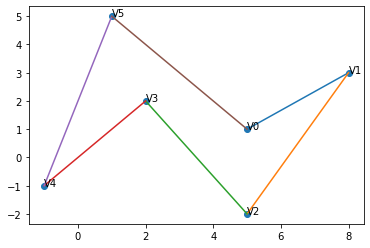

In [134]:
P = [(5,1), (8,3), (5,-2), (2,2), (-1,-1), (1,5)]
AP = dc_edge(P)
AP.plot()
for e in AP.s_e:
    print(e)
df = AP.lista()
df

[]
0
1


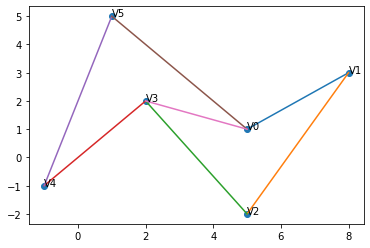

In [135]:
AP.update([(5,1),(2,2)])
AP.plot()